Password - 1000k unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..
Strength of the password based on rules(such as containing digits, special symbols , etc.)


The passwords used in our analysis are from 000webhost leak that is available online

# Importing Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

# Reading the Dataset

In [5]:
con = sqlite3.connect(r"E:\Atharva\DS Projects\Password NLP/password_data.sqlite")

In [6]:
## You have your data into 'password_Data.sqlite' which has table has 'Users' 
## Now u can read data from this db file 'password_Data.sqlite' using sqlite3 & pandas

In [7]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [8]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


# Cleaning the Dataset

In [10]:
data.isnull().sum()

index       0
password    0
strength    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [12]:
data.drop(['index'], axis = 1, inplace = True) #Removing irrelevant feature!

In [13]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [14]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# Performing Semantic Analysis 
      a) How many password textual actually holds only numeric characters ?
      b) How many password textual actually holds only Upper-case character ? 
      c) How many password textual actually holds only alphabet ?
      d) How many password textual actually holds alpha-numeric character ? 
      e) How many password textual actually holds title-case character ? 
      f) How many password textual actually holds some special special character ? 

In [16]:
data['password'][0]

'zxe870819'

In [17]:
type(data['password'][0])

str

#### a) How many password textual actually holds only numeric characters?

In [19]:
data[data["password"].str.isnumeric()].shape

(26, 2)

#### b) How many password textual actually holds only Upper-case character? 

In [21]:
data[data["password"].str.isupper()].shape

(1506, 2)

#### c) How many password textual actually holds only alphabet?

In [23]:
data[data["password"].str.isalpha()].shape

(50, 2)

#### d) How many password textual actually holds alpha-numeric character?

In [25]:
data[data["password"].str.isalnum()].shape

(97203, 2)

#### e) How many password textual actually holds title-case character?

In [27]:
data[data["password"].str.istitle()].shape #Around 932 users have their password having first alphabet capital

(932, 2)

#### f) How many password textual actually holds special character? 

In [29]:
import string

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [32]:
data[data["password"].apply(find_semantics)==1].shape

(2663, 2)

# Applying Feature Engineering

Password strength depends on 5 factors:

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

In [35]:
data["length"] = data["password"].str.len()

In [36]:
data.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [37]:
def freq_lowercase(row):         # Frequency of Uppercase Characters
    return len([char for char in row if char.islower()])/len(row)
def freq_uppercase(row):         # Frequency of Lowercase Characters
    return len([char for char in row if char.isupper()])/len(row)
def freq_numerical_case(row):    # Frequency of Numerical Characters  
    return len([char for char in row if char.isdigit()])/len(row)

In [38]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)
data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)
data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [39]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [40]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [41]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)
data["special_char_freq"] = data["special_char_freq"]/data["length"]

In [42]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


# Performing Data Analysis

In [44]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [45]:
cols = ['length', 'lowercase_freq', 'uppercase_freq', 'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

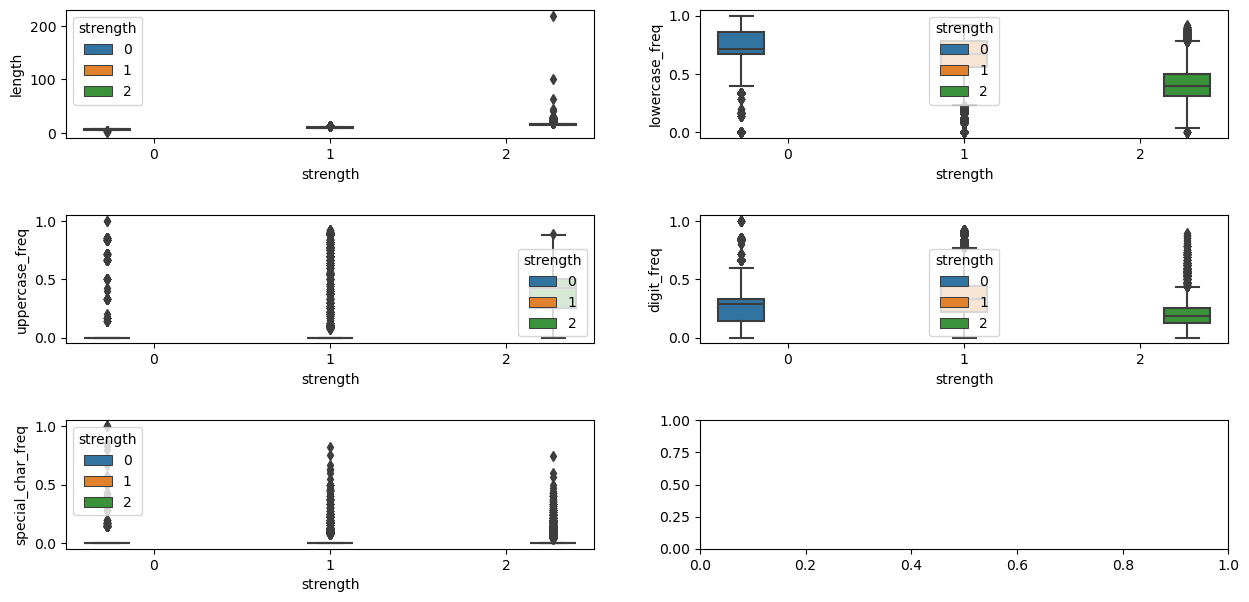

In [46]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength", y='length', hue="strength",  ax=ax1, data=data)
sns.boxplot(x="strength", y='lowercase_freq', hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength", y='uppercase_freq', hue="strength", ax=ax3, data=data)
sns.boxplot(x="strength", y='digit_freq', hue="strength", ax=ax4, data=data)
sns.boxplot(x="strength", y='special_char_freq', hue="strength", ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

Insights :

Regarding the insights we can say that:

• Higher Lowercase frequency is seen in low strength passwords. For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.

• In digit_freq there is a split of majority poplutation of strength 1 and 2 but for 0 and 1 strength , there is overlap so no too much to say there. 
But we can say a nicely propotioned password is good.   

• In upper_freq , there is a trend but not as strong as length or lower_freq.   

• Similar but stronger same trend as above in special_freq.

• Higher strength passwords have more type breaks.

# Applying TF-IDF on data

#### Term Frequency - Inverse Document Frequency 

TF-IDF vectorizer to convert text data into numerical data

TF = Number of rep of words in a sentence / Number of words in a sentence

IDF = log e (Number of sentence / Number of sentence containg the word)

In [50]:
dataframe = data.sample(frac=1) # Shuffling randomly for robustness of ML moodel 

In [51]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
72478,pkd0YdTQ0OQLipRr,2,16,0.438,0.438,0.125,0.000000
89025,nubish10,1,8,0.750,0.000,0.250,0.000000
45387,decembei23,1,10,0.800,0.000,0.200,0.000000
82927,brandal13,1,9,0.778,0.000,0.222,0.000000
83489,zazaza123,1,9,0.667,0.000,0.333,0.000000
...,...,...,...,...,...,...,...
74601,batara1,0,7,0.857,0.000,0.143,0.000000
99453,pepis123,1,8,0.625,0.000,0.375,0.000000
65108,jykodin460,1,10,0.700,0.000,0.300,0.000000
44513,access.,0,7,0.857,0.000,0.000,0.142857


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer(analyzer="char")

In [54]:
x = list(dataframe["password"])

In [55]:
X = vectorizer.fit_transform(x)

In [56]:
X.shape

(100000, 99)

In [57]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [58]:
df

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Apply Machine Learning Algorithm

In [60]:
df["length"] = dataframe['length']
df["lowercase_freq"] = dataframe['lowercase_freq']

In [61]:
df

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [62]:
y = dataframe["strength"]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

In [65]:
X_train.shape

(80000, 101)

In [66]:
y_train.shape

(80000,)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logistic = LogisticRegression(multi_class="multinomial")

In [69]:
logistic.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [70]:
y_pred = logistic.predict(X_test)

In [71]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
from collections import Counter
Counter(y_pred)

Counter({1: 16881, 2: 1686, 0: 1433})

0 = Weak Password

1 = Normal Password

2 = Strong Password

# Model Evaluation

In [75]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [76]:
accuracy_score(y_test , y_pred)

0.801

In [77]:
confusion_matrix(y_test , y_pred)

array([[  756,  1982,     1],
       [  614, 13891,   312],
       [   63,  1008,  1373]], dtype=int64)

In [78]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.28      0.36      2739
           1       0.82      0.94      0.88     14817
           2       0.81      0.56      0.66      2444

    accuracy                           0.80     20000
   macro avg       0.72      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000



# Sample Prediction

In [80]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = logistic.predict(new_matrix)
    
    if result == 0 :
        return "Password is Weak"
    elif result == 1 :
        return "Password is Normal"
    else:
        return "Password is Strong"

In [81]:
predict()

Enter a password :  Atharva@1493


'Password is Strong'

In [82]:
predict()

Enter a password :  delhi


'Password is Weak'

In [83]:
predict()

Enter a password :  SuShi54


'Password is Normal'